In [2]:
# Import Libraries
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn

import warnings

%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')


In [3]:
dataset_path = "..//datos//"
abnb_users_curated = "modified_train_users.csv"

In [4]:

users_df = pd.read_csv( dataset_path + abnb_users_curated)

In [5]:
# Print the number of records and the total number of movies
print('The dataset contains: ', len(users_df),' users.')

The dataset contains:  121070  users.


In [6]:
users_df.head()

,Unnamed: 0,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,total_seconds,average_seconds,total_sessions,number_of_devices,has_booked
0,1,820tgsjxq7,1306281600,1243100889,-9223372037,1,38.0,1,0,5,...,6,2,3,7,0,0.0,0.0,1,1,False
1,2,4ft3gnwmtx,1285632000,1244589167,1280707200,0,56.0,0,3,5,...,6,2,6,14,1,0.0,0.0,1,1,True
2,3,bjjt8pjhuk,1323043200,1256968889,1347062400,0,42.0,1,0,5,...,6,2,3,13,2,0.0,0.0,1,1,True
3,4,87mebub9p4,1284422400,1260252665,1266451200,2,41.0,0,0,5,...,6,2,3,7,1,0.0,0.0,1,1,True
4,6,lsw9q7uk0j,1262390400,1262395558,1262649600,0,46.0,0,0,5,...,6,2,3,30,1,0.0,0.0,1,1,True


In [7]:
country_dict = {
    'NDF': 0,
    'US': 1,
    'other': 2,
    'FR': 3,
    'CA': 4,
    'GB': 5,
    'ES': 6,
    'IT': 7,
    'PT': 8,
    'NL': 9,
    'DE': 10,
    'AU': 11
}


   
    

In [8]:
users_df.groupby('country_destination')['country_destination'].count()

country_destination
0     54234
1     47389
2      7392
3      3628
4      1048
5      1732
6      1665
7      1980
8       156
9       588
10      832
11      426
Name: country_destination, dtype: int64

In [27]:
users_df = users_df[ (users_df['has_booked'] == True) & (users_df['country_destination'] != 1)]
len(users_df)

19447

In [28]:
users_df[ users_df['id'] == '001y3jr7xc' ]['country_destination']


25045    11
Name: country_destination, dtype: int64

In [29]:

df_matrix = pd.pivot_table(users_df,  index='id', 
                           columns='country_destination',
                           values='has_booked',
                          aggfunc='count').fillna(0)

country_destination,2,3,4,5,6,7,8,9,10,11
id,,,,,,,,,,
001y3jr7xc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
003vss7z6h,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006mls2sjw,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
008fjkom18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009vj1jrdo,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
00a2b0s1g1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00b22f5fd2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00burea7t5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00bxmflswn,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_matrix.sample(10)

country_destination,2,3,4,5,6,7,8,9,10,11
id,,,,,,,,,,
rmwqc5yh6l,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xyo5ljgceo,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
apr8q7kdur,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64mbfccrsq,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6frg134sia,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s5ni5ftyws,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
uidc0u4gtw,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
z1i0h7wdg2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
szeofglcxy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
user_country_matrix = df_matrix.values
sparsity = float(len(user_country_matrix.nonzero()[0]))
sparsity /= (user_country_matrix.shape[0] * user_country_matrix.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 10.00%


In [31]:
user_country_sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(user_country_matrix)
print(user_country_sim_matrix.shape)

(19447, 19447)


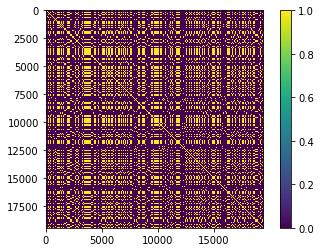

In [34]:
plt.imshow(user_country_sim_matrix);
plt.colorbar()
plt.show()

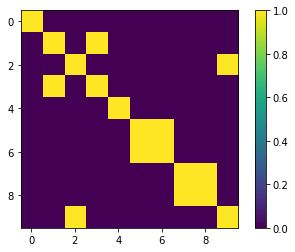

In [37]:
plt.imshow(user_country_sim_matrix[0:10,0:10]);
plt.colorbar()
plt.show()

In [46]:
for i in range(100):
    if user_country_sim_matrix[1,i] != 0:
        print(user_country_sim_matrix[1,i])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
